## Import Libraries

In [1]:
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import bootstrap_contrast as bsc

import espresso as esp

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Create espresso instances

In [2]:
git_repo_folder='/Users/josesho/bin/git-repos/espresso'

datadir1=os.path.join(git_repo_folder,'data/by_genotype/Trh-Gal4-Trh-Zal-UAS-GZ-TrpA1/22')
datadir2=os.path.join(git_repo_folder,'data/by_genotype/Trh-Gal4-Trh-Zal-UAS-GZ-TrpA1/29')
datadir3=os.path.join(git_repo_folder,'data/starvation_gradient/0-Hrs')
datadir4=os.path.join(git_repo_folder,'data/starvation_gradient/24-Hrs')
datadir5=os.path.join(git_repo_folder,'data/starvation_gradient/48-Hrs')
datadir6=os.path.join(git_repo_folder,'data/24-Hrs-starved-choice')

twotubes22=esp.espresso(folder=datadir1)
twotubes29=esp.espresso(folder=datadir2)

starvation0=esp.espresso(folder=datadir3)
starvation0.add_label(label_name='starved_time',label_value='0-Hrs')

starvation24=esp.espresso(folder=datadir4)
starvation24.add_label(label_name='starved_time',label_value='24-Hrs')

starvation48=esp.espresso(folder=datadir5)
starvation48.add_label(label_name='starved_time',label_value='48-Hrs')

starved=starvation0+starvation24+starvation48

starved_choice=esp.espresso(folder=datadir6)

starved_time has been added as a new label, with '0-Hrs' as the custom value.
starved_time has been added as a new label, with '24-Hrs' as the custom value.
starved_time has been added as a new label, with '48-Hrs' as the custom value.


## Plotting

In [3]:
starved_choice.feeds.columns

Index(['StartTime', 'StartFrame', 'FeedTubeIdx', 'FlyID', 'ChoiceIdx',
       'AviFile', 'FeedVol_µl', 'FeedDuration_ms', 'Evap-mm3/s', 'Valid',
       'RelativeTime_s', 'ExperimentState', 'FeedVol_nl', 'FeedSpeed_nl/s',
       'FeedDuration_s', 'Genotype', 'Sex', 'Minimum Age', 'Maximum Age',
       'Tube1', 'Tube2', 'Temperature', 'FlyCountInChamber', 'FoodChoice',
       'FeedLog_rawfile'],
      dtype='object')

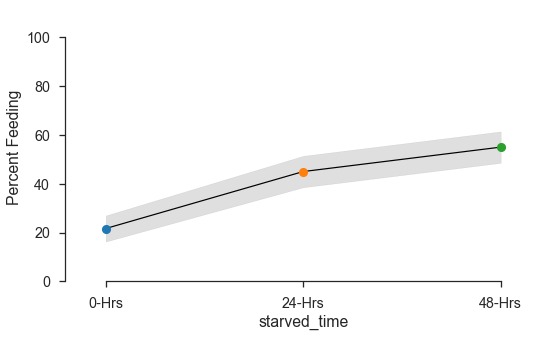

In [4]:
f,s=starved.plot.percent_feeding(group_by='starved_time',
                                    palette_type='categorical',time_end=60)


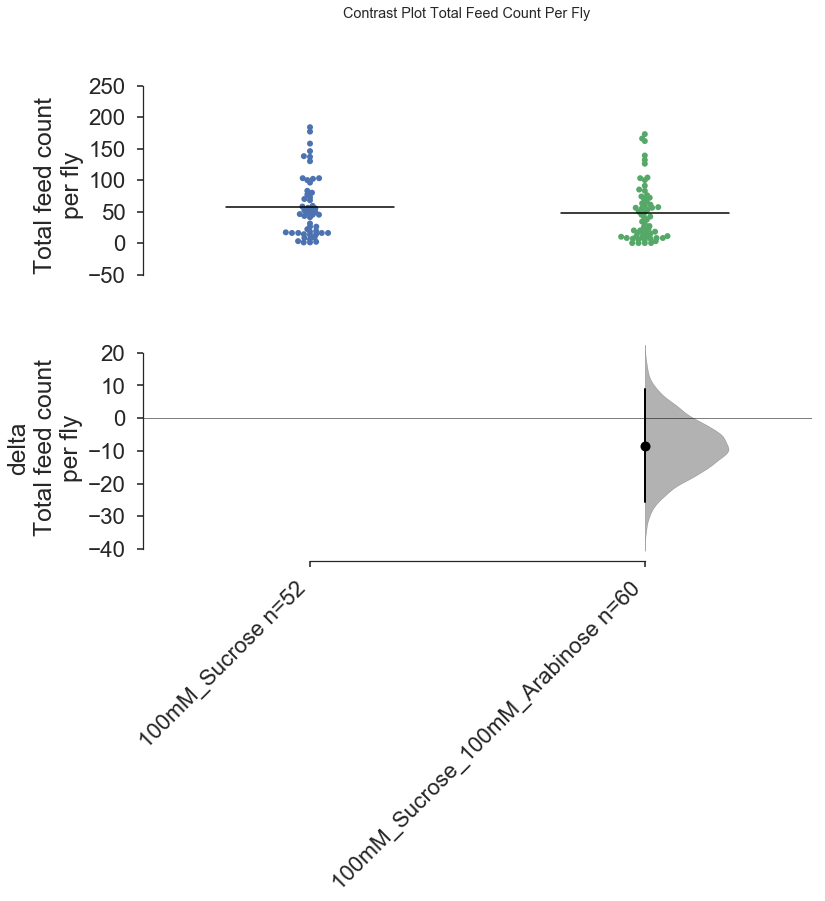

In [5]:
f,summ=starved_choice.plot.contrast.feed_count_per_fly(group_by='FoodChoice')

In [6]:
starved_choice

2 feedlogs with a total of 60 flies.
1 genotype ['w1118'].
1 temperature [29].
2 foodtypes ['100mM_Sucrose' '100mM_Sucrose_100mM_Arabinose'].

plotting w1118 rasters
Be patient, this can take up to 60s.
plotting w1118 volume timecourse


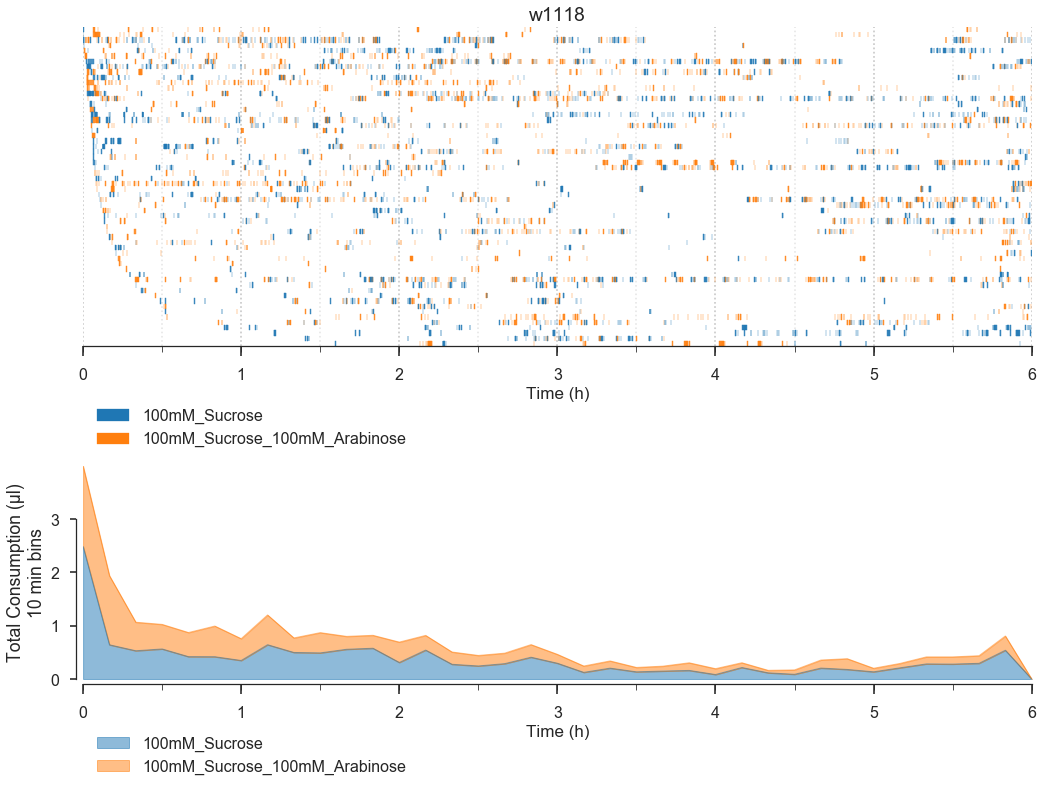

In [7]:
f=starved_choice.plot.rasters(group_by='Genotype',
                              show_feed_color=True)

plotting 0-Hrs rasters
Be patient, this can take up to 60s.
plotting 0-Hrs volume timecourse
plotting 24-Hrs rasters
Be patient, this can take up to 60s.
plotting 24-Hrs volume timecourse
plotting 48-Hrs rasters
Be patient, this can take up to 60s.
plotting 48-Hrs volume timecourse


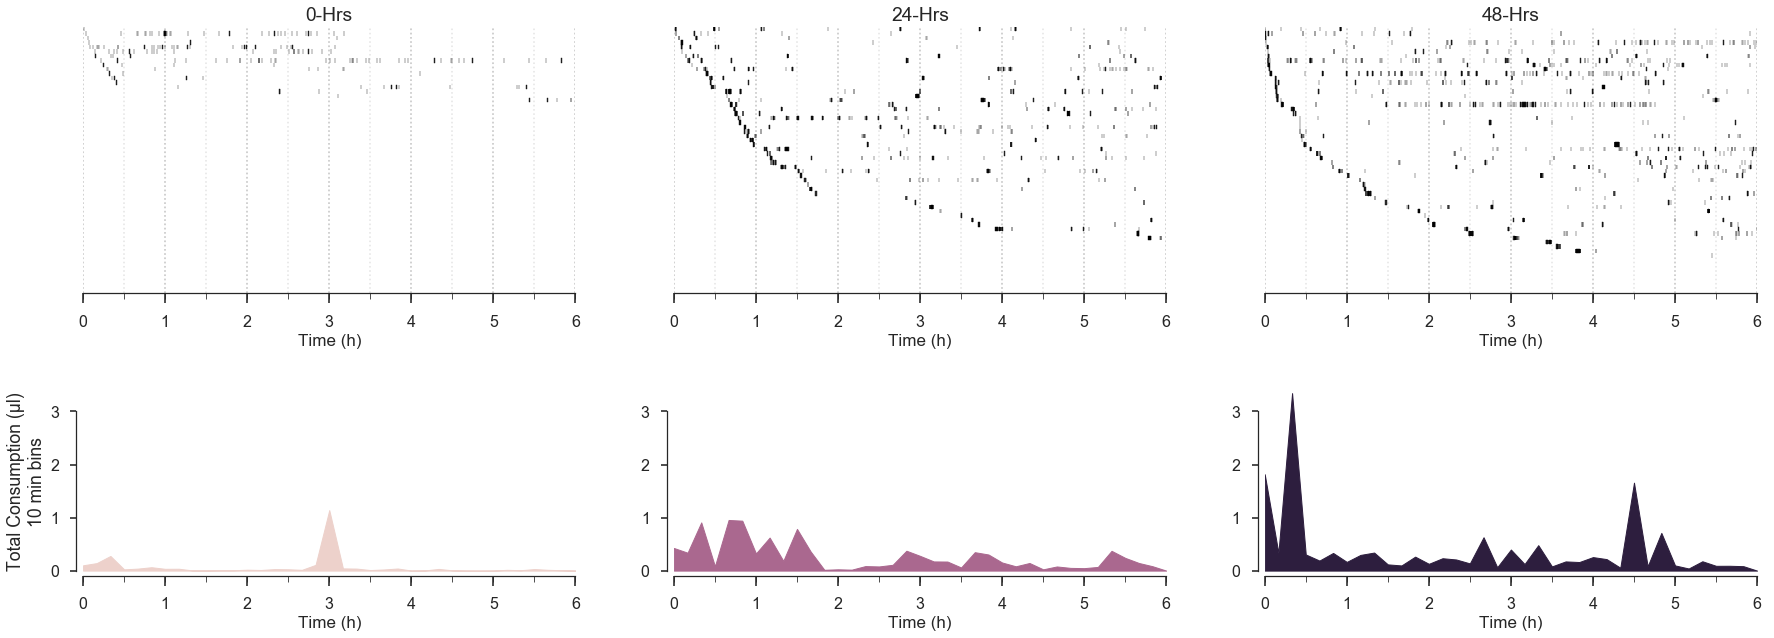

In [4]:
f=starved.plot.rasters(group_by='starved_time',figsize=(10,10),
                       feed_volume_palette_type='sequential')